In [1]:
import os
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt

from functools import reduce

In [3]:
# Correr para crear pickle de data
# Guardar Copia de PAE_2019.xlsx en carpeta Data (El archivo es muy grande para subirse a github)

folder = 'Data'
ruta_pickle = 'DATA_JUNAEB2019.pkl'

path = os.path.join(folder, 'Copia de PAE_2019.xlsx')
data = pd.read_excel(path)

path_pickle = os.path.join(folder, ruta_pickle)
with open(path_pickle, 'wb') as archivo:
    pickle.dump(data, archivo)

In [138]:
folder = 'Data'
ruta_pickle = 'DATA_JUNAEB2019.pkl'

path_pickle = os.path.join(folder, ruta_pickle)

path = os.path.join(path_pickle)
with open(path, 'rb') as file:
    data = pickle.load(file)

path = os.path.join(folder, 'Colegios(Continental)2020.xlsx')
schools = pd.read_excel(path)

In [139]:
data.columns.values

array(['Unnamed: 0', 'InstituciÃ³n', 'RUTEmpresa', 'Tipo',
       'Concesionario', 'Nombre', 'Anno', 'Mes', 'Licitacion',
       'LineadeProducto', 'Region', 'Provincia', 'Nombre_A', 'Comuna',
       'Nombre_B', 'Ute', 'Rbd', 'dv', 'Nombre_C', 'Direccion',
       'Programa', 'Servicio', 'Estrato', 'Nivel', 'TC', 'Cocina',
       'RacEqJunaeb', 'RacEqJecd', 'Precio', 'PrecioPlus', 'DiasASI',
       'TotalRacEqAsigMes', 'Decimo$', 'DiasServidos', 'RacEqRealJunaeb',
       'RacEqRealJecd', 'TotalRacEqRealMes', 'TotalRacEqPagadas',
       'TotalRacIncompletas', 'Tramo', 'Precio$Aju', 'Plus$Aju',
       'RacIncompletas$', 'TotalServidas$', 'TotalNoServidas$',
       'RealTotal$', 'Folio', 'RacionesNoServidasPagodeExcepcion50',
       'Diasal50', 'RacionesNoServidasPagodeExcepcion30', 'Diasal30',
       'Dependencia', 'Sector', 'Acceso', 'IVE', 'Matricula', 'ESTASI',
       'ESTAJU', 'Inactiva', 'CodRacNoServ', 'SIGE', 'RBDMINEDUC',
       'DVMINEDUC', 'DiasCertificados', 'CompensaciÃ³n',
  

In [140]:
data.rename(columns = {'InstituciÃ³n':'Institución'}, inplace=True)

In [141]:
data['Servicio'] = data['Servicio'].str.strip()
data = data[data['Institución'] == 'JU'] # Seleccionar data JUNAEB

rbds = list(schools.RBD.values)
services = data.Servicio.unique()

In [142]:
data.TotalRacEqPagadas.dtype

dtype('int64')

In [143]:
data['Precio$Aju']

0         1338.833
1         1192.313
2         1572.805
3         1538.314
4          1369.97
            ...   
577394     752.678
577395            
577396     784.835
577397     766.243
577398     766.243
Name: Precio$Aju, Length: 577399, dtype: object

In [144]:
data['Precio$Aju'] = data['Precio$Aju'].replace(' ', 0)
data[data['Precio$Aju']==' ']['Nivel'].unique()

array([], dtype=object)

In [145]:
data['PrecioPorRacion'] = data['RealTotal$Pagado']/data['TotalRacEqPagadas']
data['PrecioPorRacion'] = data['PrecioPorRacion'].replace(np.NaN, 0)
data['PrecioPorRacion'] = data['PrecioPorRacion'].replace(np.inf, 0)

In [146]:
data_fil = data[data['PrecioPorRacion']<50000]

In [148]:
print(services)

['O' 'D' 'A' 'C' 'T' 'DCO' 'S/I' 'ACO' 'DCE' 'ACE']


In [149]:
print(rbds)

[2419, 11287, 887864, 8325, 887991, 2532, 2660, 8391, 887874, 887974, 18, 78, 204, 10915, 885060, 886727, 887189, 887928, 887953, 3999, 4195, 887850, 4104, 17897, 993096, 883763, 1233, 40352, 1185, 1433, 1448, 887147, 8458, 2116, 2129, 2139, 2140, 2143, 2223, 2243, 2246, 2264, 2266, 2279, 2294, 2311, 2324, 2328, 2330, 2375, 2379, 2387, 2413, 2414, 2423, 2428, 8564, 9987, 9994, 9998, 10001, 10006, 10077, 10080, 10085, 10090, 10100, 10104, 10113, 10120, 10134, 10409, 15753, 15762, 25047, 25315, 25642, 26157, 40024, 887975, 887996, 5216, 5220, 5224, 5225, 5228, 5248, 5273, 5284, 5289, 5333, 5363, 5382, 5394, 5396, 5434, 5440, 5510, 5538, 5539, 5548, 5550, 5580, 5823, 5824, 5825, 5827, 5828, 5829, 5831, 5832, 5833, 5880, 6066, 6084, 6085, 6086, 6089, 6090, 6092, 6108, 6164, 6227, 6270, 6272, 6285, 6304, 6350, 6352, 6398, 6456, 6471, 6586, 6587, 6589, 6604, 6652, 6708, 6710, 6711, 6712, 6718, 6721, 6726, 6731, 11520, 16941, 19902, 19906, 19913, 19952, 19993, 20121, 20200, 885300, 887842, 88

In [151]:
raciones = {ser: [] for ser in services}
precios = {ser: [] for ser in services}
unitary_prices = {ser: [] for ser in services} # auxiliar para gráficar

for rbd in rbds:
    selected_data = data_fil[data_fil['Rbd'] == rbd]
    for ser in services:
        if ser in selected_data['Servicio'].unique():
            raciones_servicio = selected_data[selected_data['Servicio'] == ser]['TotalRacEqPagadas']
            precios_servicio = selected_data[selected_data['Servicio'] == ser]['Precio$Aju']

            raciones[ser].append(raciones_servicio.sum())
            precios[ser].append(precios_servicio.sum()/precios_servicio.count())
            unitary_prices[ser].append((precios_servicio.sum()/precios_servicio.count(), raciones_servicio.sum()))
        else:
            raciones[ser].append(0)
            precios[ser].append(0)
            unitary_prices[ser].append((0,0))
            
raciones['RBD'] = list(rbds)
precios['RBD'] = list(rbds)
unitary_prices['RBD'] = list(rbds)

In [152]:
raciones = pd.DataFrame.from_dict(raciones)
raciones

,O,D,A,C,T,DCO,S/I,ACO,DCE,ACE,RBD
0,0,31688,31790,0,5398,0,0,0,0,0,2419
1,17732,45222,41762,0,24106,0,0,0,0,0,11287
2,0,0,0,0,0,0,0,0,0,0,887864
3,0,49445,49840,0,22499,0,0,0,0,0,8325
4,0,0,0,0,0,0,0,0,0,0,887991
...,...,...,...,...,...,...,...,...,...,...,...
8929,0,0,0,0,0,500,0,0,0,0,913163
8930,0,0,0,0,0,0,0,12,0,0,913225
8931,0,0,0,0,0,14770,0,0,0,0,940401
8932,0,0,0,0,0,1459,0,0,0,0,941450


In [153]:
precio_por_racion = pd.DataFrame.from_dict(precios)
precio_por_racion

,O,D,A,C,T,DCO,S/I,ACO,DCE,ACE,RBD
0,0.0000,840.346667,966.091433,0.0,264.479312,0.00000,0.0,0.0,0.0,0.0,2419
1,1038.1942,923.463000,1124.789105,0.0,262.959500,0.00000,0.0,0.0,0.0,0.0,11287
2,0.0000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,887864
3,0.0000,489.906897,974.570692,0.0,916.061870,0.00000,0.0,0.0,0.0,0.0,8325
4,0.0000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,887991
...,...,...,...,...,...,...,...,...,...,...,...
8929,0.0000,0.000000,0.000000,0.0,0.000000,888.28500,0.0,0.0,0.0,0.0,913163
8930,0.0000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,913225
8931,0.0000,0.000000,0.000000,0.0,0.000000,876.18725,0.0,0.0,0.0,0.0,940401
8932,0.0000,0.000000,0.000000,0.0,0.000000,861.63950,0.0,0.0,0.0,0.0,941450


In [154]:
precio_por_racion.describe()

,O,D,A,C,T,DCO,S/I,ACO,DCE,ACE,RBD
count,8934.000000,8934.000000,8934.000000,8934.000000,8934.000000,8934.000000,8934.0,8934.000000,8934.000000,8934.000000,8934.000000
mean,284.887299,613.649273,900.919501,82.939774,587.748009,24.798388,0.0,24.789157,42.511754,64.472331,78562.969443
std,507.190796,250.234292,387.066368,451.232213,452.820081,153.255907,0.0,193.951419,206.985232,313.271243,237964.143672
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000
25%,0.000000,519.210871,867.143018,0.000000,357.484075,0.000000,0.0,0.000000,0.000000,0.000000,3744.250000
50%,0.000000,609.315900,960.628000,0.000000,579.737200,0.000000,0.0,0.000000,0.000000,0.000000,7923.000000
75%,586.048000,764.835167,1056.185727,0.000000,850.416800,0.000000,0.0,0.000000,0.000000,0.000000,16712.500000
max,6362.454000,4678.734000,4678.734000,6362.454000,3461.652300,1895.725000,0.0,2480.486500,1828.542000,2471.844400,993187.000000


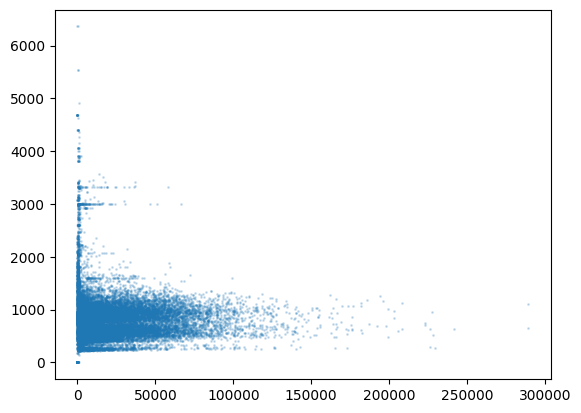

In [155]:
new_list = [values for key, values in  unitary_prices.items() if key in services]

massive = reduce(lambda x, y: x + y, new_list)

y = [value[0] for value in massive]
x = [value[1] for value in massive]

plt.scatter(x, y, alpha=0.2,  s=1)

In [156]:
data

,Unnamed: 0,Institución,RUTEmpresa,Tipo,Concesionario,Nombre,Anno,Mes,Licitacion,LineadeProducto,...,RealTotal$Pagado,PorcentajePeriodo1,RacionesNoServidasPEXPeriodo1,DiasPeriodo1,PorcentajePeriodo2,RacionesNoServidasPEXPeriodo2,DiasPeriodo2,CodigodeCausa,CodigodeProducto,PrecioPorRacion
0,5545473,JU,86.400.400-8,RZG,5,DISTAL,2019,1,3716,1,...,590425,0,0,0,0,0,0,,,1338.832200
1,5545474,JU,86.400.400-8,RZG,5,DISTAL,2019,1,3716,1,...,525809,0,0,0,0,0,0,,,1192.310658
2,5545475,JU,86.400.400-8,RZG,5,DISTAL,2019,1,3716,1,...,699898,0,0,0,0,0,0,,,1572.804494
3,5545476,JU,86.400.400-8,RZG,5,DISTAL,2019,1,3716,1,...,323046,0,0,0,0,0,0,,,1538.314286
4,5545477,JU,86.400.400-8,RZG,5,DISTAL,2019,1,3716,1,...,287693,0,0,0,0,0,0,,,1369.966667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577394,6122867,JU,76.179.650-K,ASN,95,OPTIMIZAR,2019,12,2718,2,...,101610,70,60,5,55,60,5,Cod:2,,1693.500000
577395,6122868,JU,76.179.650-K,ASN,95,OPTIMIZAR,2019,12,2718,2,...,146393,70,60,5,55,60,5,Cod:2,,2439.883333
577396,6122869,JU,76.179.650-K,ASN,95,OPTIMIZAR,2019,12,2718,2,...,3924,0,0,0,0,0,0,Cod:2,,784.800000
577397,6122870,JU,76.179.650-K,ASN,95,OPTIMIZAR,2019,12,2718,2,...,194624,70,100,5,55,20,1,Cod:2 -14,A -B,1138.152047


In [18]:
# Calculo de promedio de raciones

cant_total_pagada = 0
cant_raciones_totales = 0

for rbd in rbds:
    selected = data[data['Rbd']==rbd]
    cant_total_pagada += selected['RealTotal$'].sum()
    cant_raciones_totales += selected['TotalRacEqPagadas'].sum()

cant_total_pagada/cant_raciones_totales

924.5887495463029

In [19]:
parent_folder = 'Data'
folder = 'Raciones'
path = os.path.join(parent_folder, folder, 'Raciones_totales_2019.xlsx')

raciones.to_excel(path, index=False)